In [1]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import math
import sys
import os

# Question 1.

(1273, 1920, 3)


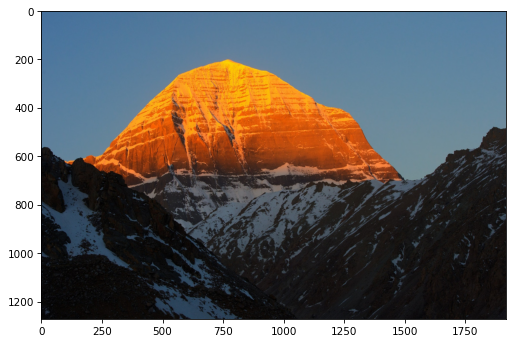

In [2]:
img = cv2.imread(os.path.abspath('../data/img.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.figure(figsize=(8, 6), dpi=75)
plt.imshow(img)

# Question 2.

Execution Time in Seconds:  0.004723310470581055


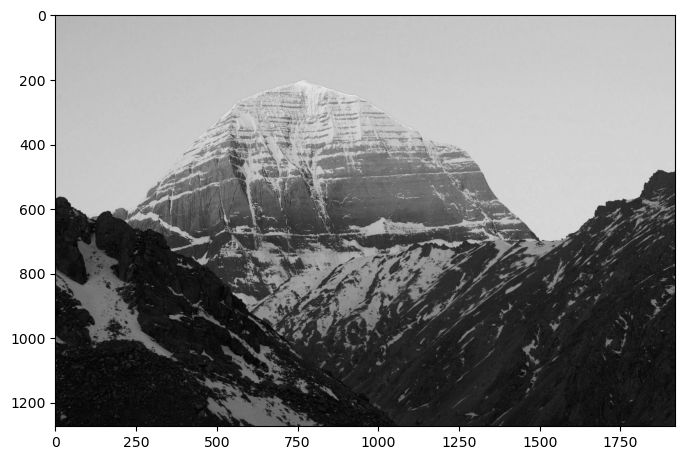

True

In [3]:
import time
start = time.time()

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

end = time.time()
print("Execution Time in Seconds: ",end - start)
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(gray_img,cmap='gray')
plt.show()
filename=os.path.abspath('../data/converted_grayscale_image.jpg')
cv2.imwrite(filename, gray_img)

# Question 3.

Execution Time in Seconds:  0.11851310729980469


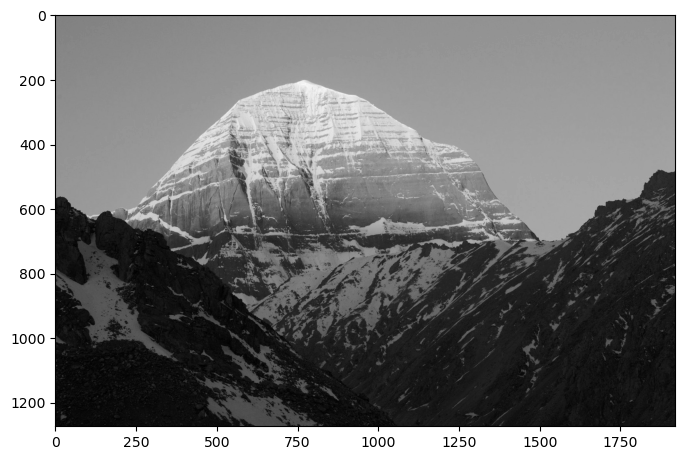

In [4]:
import time
start = time.time()

img_array=np.array(img)
grayscale_array=np.array([[0.2989, 0.5870, 0.1140]])
gray_img2=np.dot(img_array,grayscale_array.T)

end = time.time()
print("Execution Time in Seconds: ",end - start)
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(gray_img2,'gray')
plt.show()

# Question 4.

In [5]:
import numpy as np
import cv2 as cv2
height,width=img.shape[0],img.shape[1]
gray_img_v3=np.zeros((height,width))

In [6]:
%%cmd
python setup.py build_ext --inplace

Microsoft Windows [Version 10.0.22621.1105]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Manohar Vemuri\OneDrive\MS\Computer Vision\cs512-s23-vemuri-saimanohar\AS1\src>python setup.py build_ext --inplace
running build_ext

C:\Users\Manohar Vemuri\OneDrive\MS\Computer Vision\cs512-s23-vemuri-saimanohar\AS1\src>

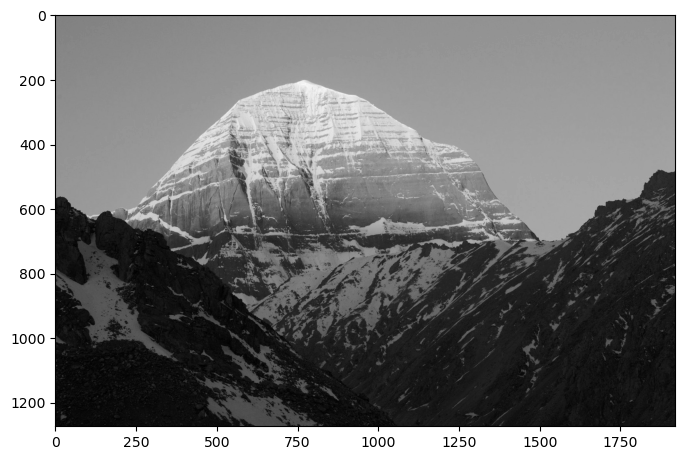

Execution Time in Seconds:  2.167846918106079


In [7]:
import time
import my
start = time.time()

Cyres=my.grayscale_cython(img, height,width,gray_img_v3)

end = time.time()
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(Cyres,'gray')
plt.show()
print("Execution Time in Seconds: ",end - start)

# Question 5.

In [8]:
r2=[]
g2=[]
b2=[]
for i in range(height):
    for j in range(width):
        r,g,b=img[i][j]
        r2.append(r)
        g2.append(g)
        b2.append(b)
r2=np.array(r2)
g2=np.array(g2)
b2=np.array(b2)

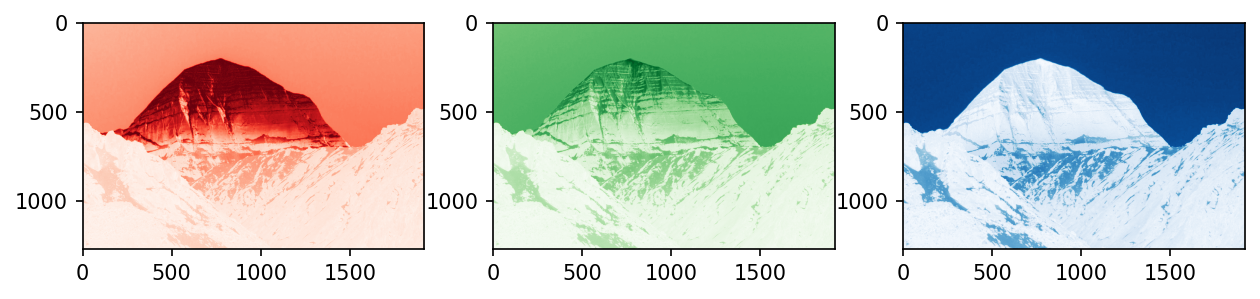

In [9]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplot(1,3,1)
plt.imshow(r2.reshape(img.shape[:-1]),cmap='Reds')
plt.subplot(1,3,2)
plt.imshow(g2.reshape(img.shape[:-1]),cmap='Greens')
plt.subplot(1,3,3)
plt.imshow(b2.reshape(img.shape[:-1]),cmap='Blues')

# Question 6.

In [10]:
def nothing(x):
    pass

cv2.namedWindow('controls')
cv2.createTrackbar('r','controls',0,360,nothing)

height,width=img.shape[0],img.shape[1]
center = (width/2, height/2)
while(1):
    angle= int(cv2.getTrackbarPos('r','controls'))
    rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)
    rotated_image = cv2.warpAffine(
    src=img, M=rotate_matrix, dsize=(width, height))
    cv2.imshow('image',rotated_image)
    cv2.setWindowProperty('image', 1, cv2.WINDOW_NORMAL)
    cv2.resizeWindow('image', height, width)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

# Question 7.

In [11]:
%%cmd
python setup3.py build_ext --inplace

Microsoft Windows [Version 10.0.22621.1105]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Manohar Vemuri\OneDrive\MS\Computer Vision\cs512-s23-vemuri-saimanohar\AS1\src>python setup3.py build_ext --inplace
running build_ext

C:\Users\Manohar Vemuri\OneDrive\MS\Computer Vision\cs512-s23-vemuri-saimanohar\AS1\src>

In [12]:
import time
import my3
start = time.time()
Cyres=my3.rotation_warp(45,img)
end = time.time()
print("Execution Time in Seconds: ",end - start)

Execution Time in Seconds:  4.978718042373657


# Question 8.

In [13]:
%%cmd
python setup2.py build_ext --inplace

Microsoft Windows [Version 10.0.22621.1105]
(c) Microsoft Corporation. All rights reserved.

C:\Users\Manohar Vemuri\OneDrive\MS\Computer Vision\cs512-s23-vemuri-saimanohar\AS1\src>python setup2.py build_ext --inplace
running build_ext

C:\Users\Manohar Vemuri\OneDrive\MS\Computer Vision\cs512-s23-vemuri-saimanohar\AS1\src>

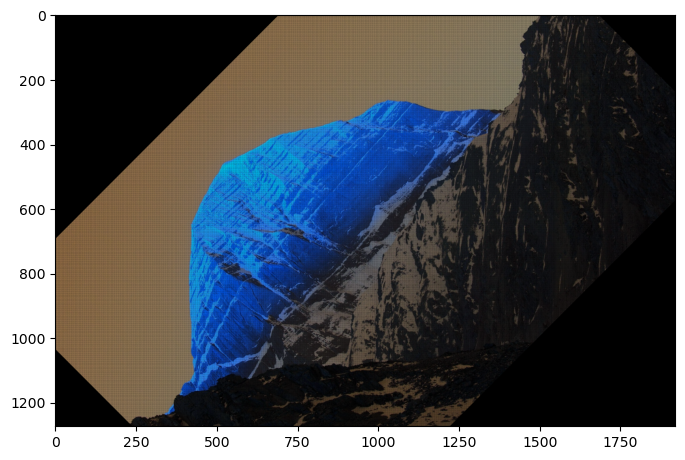

Execution Time in Seconds:  32.007585763931274


In [14]:
import time
import my2
start = time.time()

Cyres_rotate=my2.rotate_image(img, 45,0)

end = time.time()
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(cv2.cvtColor(Cyres_rotate, cv2.COLOR_BGR2RGB))

cv2.imwrite(os.path.abspath('../data/img_rotated.jpg'),cv2.cvtColor(Cyres_rotate, cv2.COLOR_BGR2RGB))
plt.show()
print("Execution Time in Seconds: ",end - start)

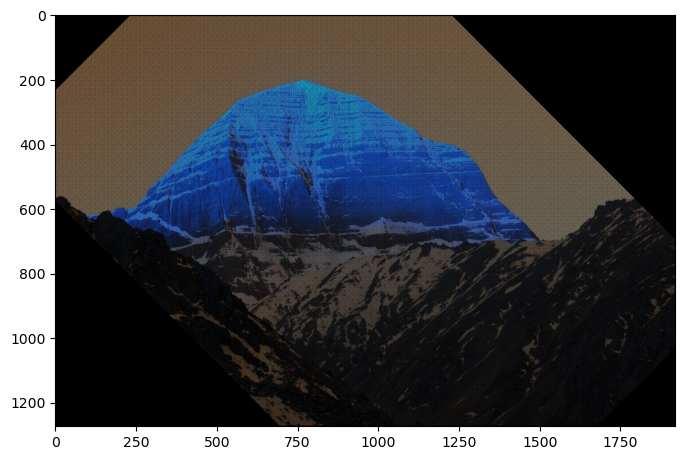

Execution Time in Seconds:  59.15490365028381


In [15]:
import time
import my2

img_rotate = cv2.imread(os.path.abspath('../data/img_rotated.jpg'))
img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2RGB)
start = time.time()

Cyres_original=my2.rotate_image(img_rotate, 45,1)

end = time.time()
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(cv2.cvtColor(Cyres_original, cv2.COLOR_BGR2RGB))
cv2.imwrite(os.path.abspath('../data/img_original.jpg'),cv2.cvtColor(Cyres_original, cv2.COLOR_BGR2RGB))

plt.show()
print("Execution Time in Seconds: ",end - start)

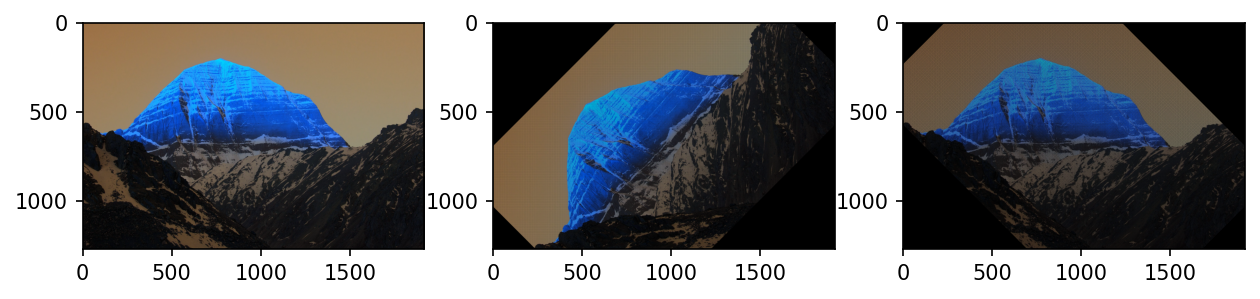

In [16]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(cv2.cvtColor(Cyres_rotate, cv2.COLOR_BGR2RGB))
plt.subplot(133)
plt.imshow(cv2.cvtColor(Cyres_original, cv2.COLOR_BGR2RGB))

In [17]:
#Trying with different image with resolution 500x500

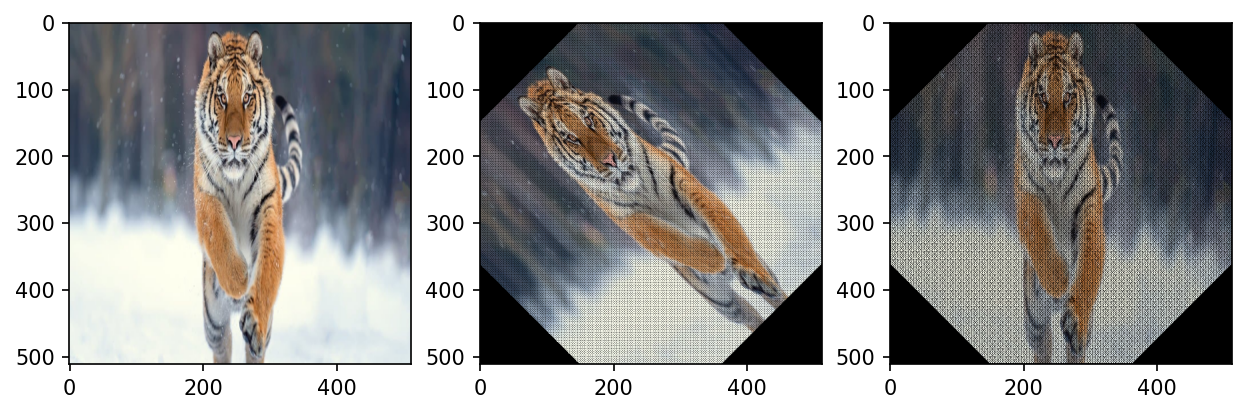

In [18]:
img = cv2.imread(os.path.abspath('../data/img1.jpg'))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(512,512))
Cyres_rotate=my2.rotate_image(img, 45,0)
Cyres_original=my2.rotate_image(Cyres_rotate, 45,1)
plt.figure(figsize=(10, 8), dpi=150)
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(Cyres_rotate)
plt.subplot(133)
plt.imshow(Cyres_original)
plt.show()